# Experiment 01: Influence of number of centers

In [1]:
%matplotlib inline

import os
import sys
import copy
import time
import pickle
from array import array
import numpy as np
np.seterr(over='ignore')
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy import optimize
from scipy.interpolate import RegularGridInterpolator
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import interact, interactive, fixed, FloatSlider

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

# VarClump functions
sys.path.append('../lib/')
from utils import *
from graph import *
from points_generation import *
from initial_guess import *
from variational import *
from gmr import *

## Loading data 2D

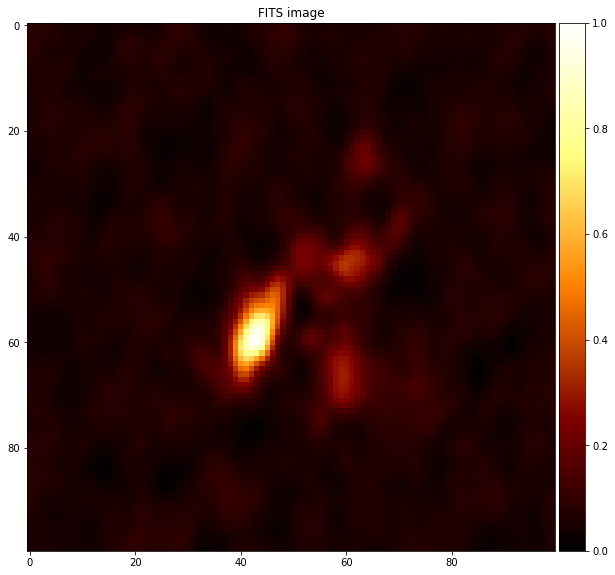

In [4]:
"""
Loading data
"""

fits_path = '../data/images/Orion.cont.image.fits'
x, y, data, dfunc = load_data(fits_path)
image_plot(data)

In [5]:
base_level = estimate_rms(data)
interact(thresholded_image_plot, data=fixed(data), level=FloatSlider(min=base_level,max=1.,step=0.01,value=base_level))

/home/mavillan/anaconda3/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


<function graph.thresholded_image_plot>

In [6]:
# common parameters
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig

elm_list = list()

for Nc in range(50, 501, 25):
    # number of points of each type
    Nb = int(0.2*Nc)
    Ne = 3*Nc - Nb
    
    # points generation
    points = qrandom_centers_generation(dfunc, Nc+Ne, base_level, ndim=2)
    center_points = points[0:Nc]
    collocation_points = points[Nc:Nc+Ne]
    boundary_points = boundary_points_generation(data, base_level, Nb)
    
    # points generation
    #center_points = random_centers_generation(data, Nc, base_level=base_level, power=2.)
    #collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
    #boundary_points = boundary_points_generation(data, base_level, Nb)
    
    # right format
    xc = center_points[:,0]
    yc = center_points[:,1]
    xe = collocation_points[:,0]
    ye = collocation_points[:,1]
    xb = boundary_points[:,0]
    yb = boundary_points[:,1]
    
#    # visualizing the choosen points
#    points_plot(data, center_points=center_points, title="Center Points")
#    points_plot(data, center_points=collocation_points, title="Collocation Points")


    ####################################
    # Initial parameters estimation
    ####################################
    #c0, sig0 = estimate_initial_guess(center_points, f, R=0.009, method='mean_dist')
    c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')
    #c0, sig0 = _estimate_initial_guess(dfunc, data, center_points, base_level)


#    solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
#    params_plot(c0, sig0, xc, yc)
#    params_distribution_plot(c0, sig0)
    elm_list.append(ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=0., b=0., d1psi1=d1psi, 
                    d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.))

##########################################################################################
Processing 50 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 20100.
nfev: 20110

Residual stats:
Residual RMS: 0.042706594478918856
Residual Variance: 0.0018166293887789302
Flux Lost: 0.05241456089771732
Flux Addition: 0.06499335048793545
psi1(u-f): 0.6685536070164615
Exceeded Pixels: 512
Sharpness: 42.707177710652914
psi2(grad u): 2.3353256088590464
Total elapsed time: 10.095632791519165 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06323976384058658
Mean min distance between collocation and center poi

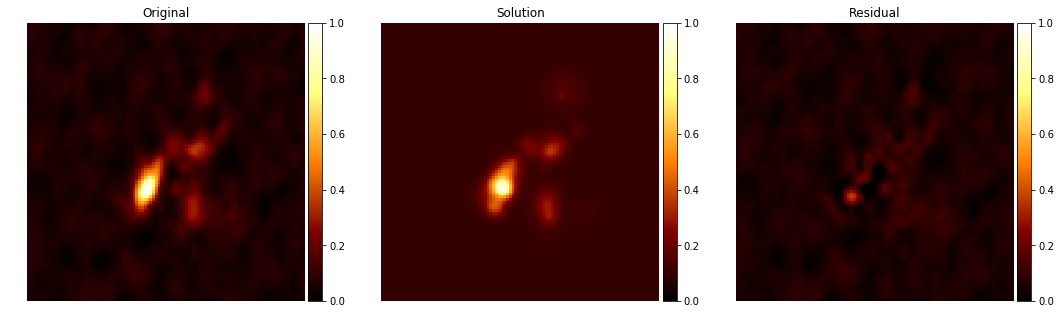

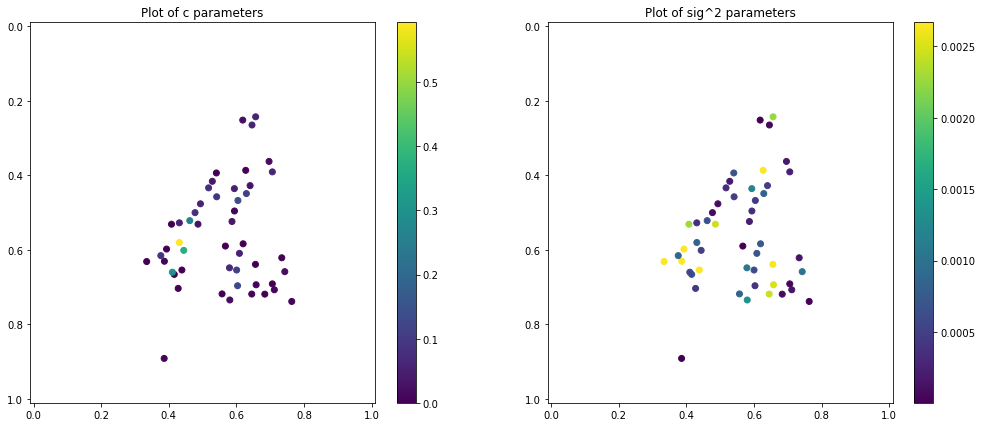

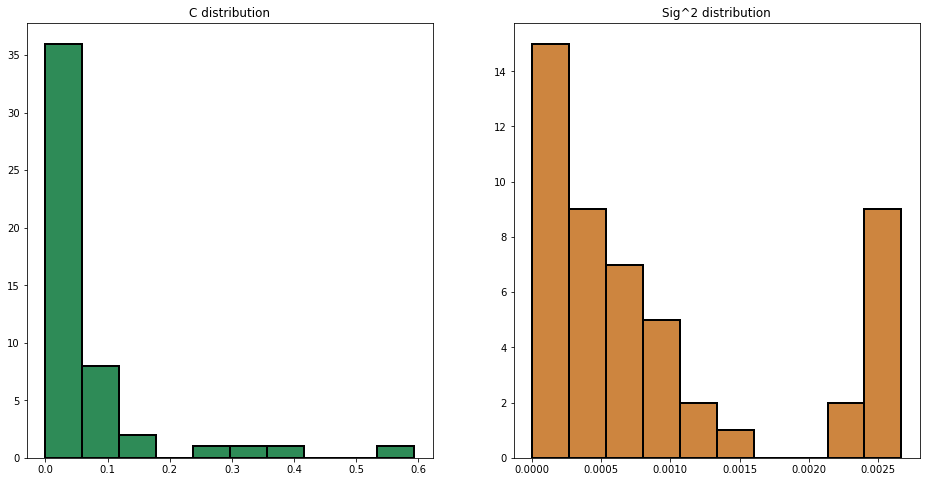

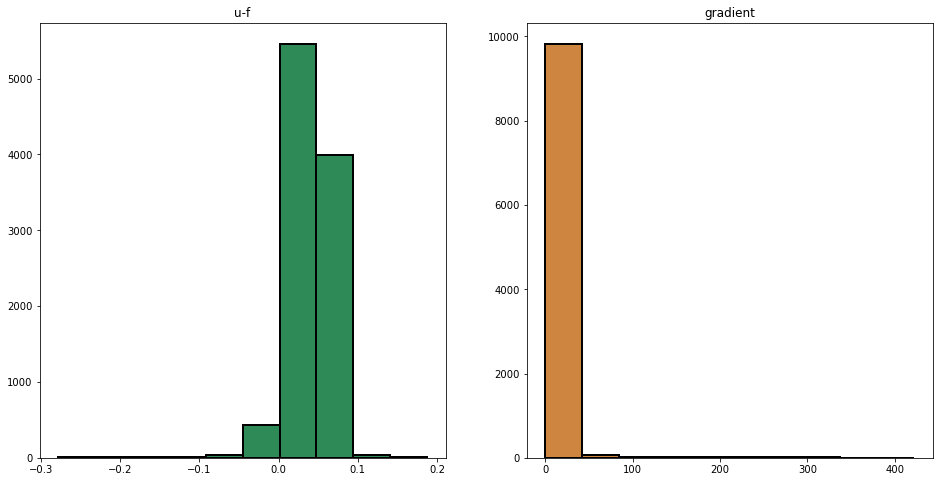

##########################################################################################
Processing 75 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 30100.
nfev: 30111

Residual stats:
Residual RMS: 0.015194113608284836
Residual Variance: 0.00022791494804773015
Flux Lost: 0.02873938724924884
Flux Addition: 0.020706308763802705
psi1(u-f): 0.016745018476724646
Exceeded Pixels: 457
Sharpness: 44.03294000238816
psi2(grad u): 3.6318512538381396
Total elapsed time: 19.934627056121826 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.051103808909095494
Mean min distance between collocation and center

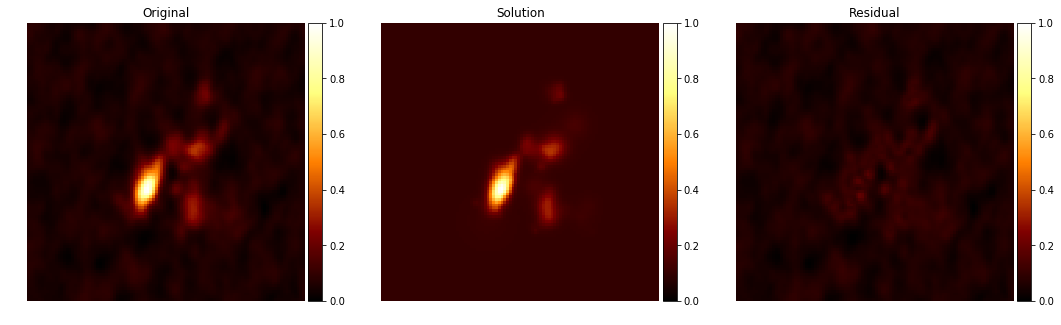

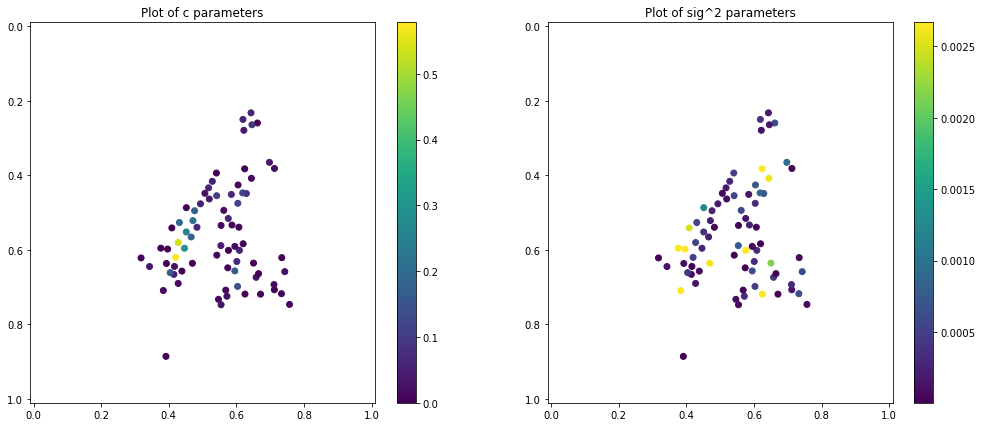

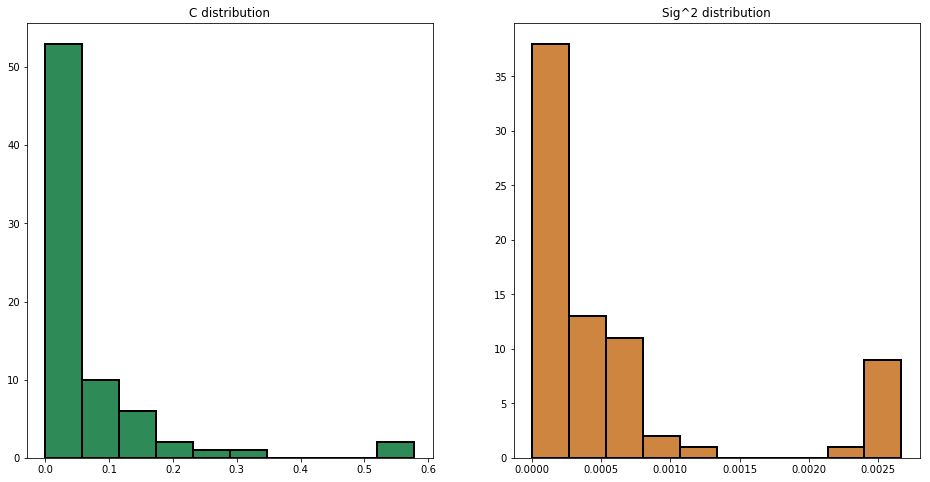

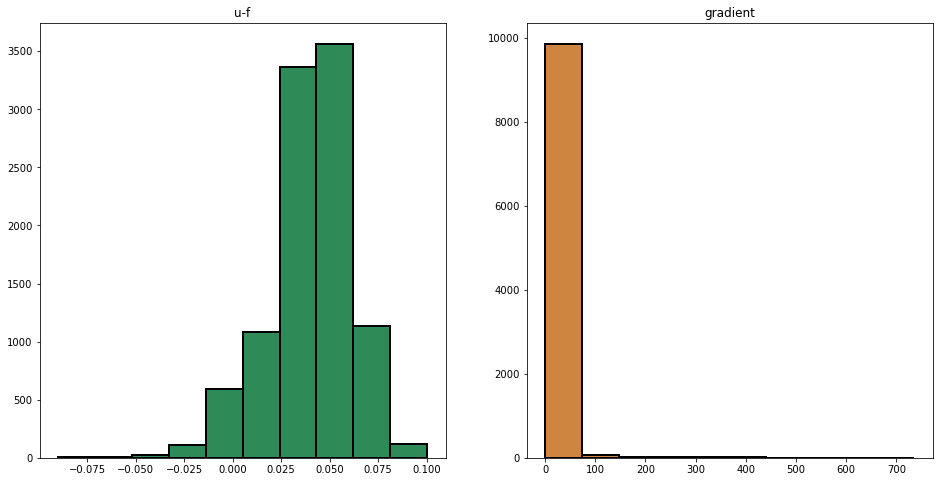

##########################################################################################
Processing 100 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 40100.
nfev: 40111

Residual stats:
Residual RMS: 0.010307510225840838
Residual Variance: 0.00010417448629184087
Flux Lost: 0.02069812589871081
Flux Addition: 0.0139641753673756
psi1(u-f): 0.006494106357997837
Exceeded Pixels: 432
Sharpness: 44.42154491070136
psi2(grad u): 3.7573834337112286
Total elapsed time: 34.04168128967285 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.04411655219905213
Mean min distance between collocation and center po

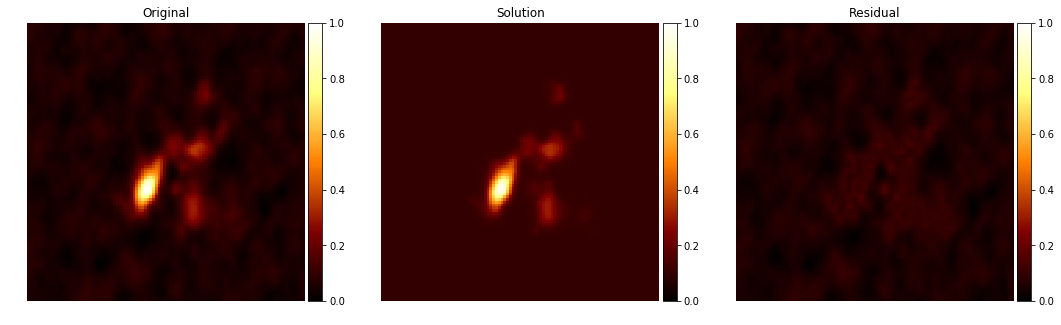

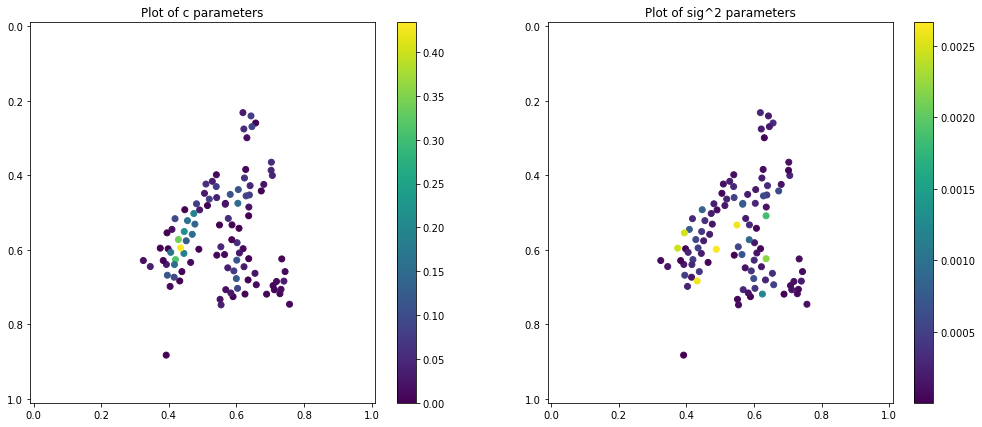

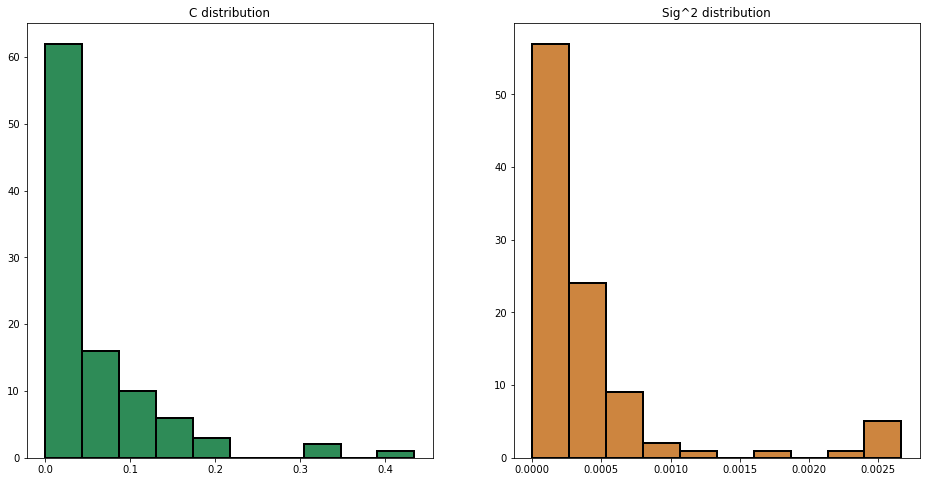

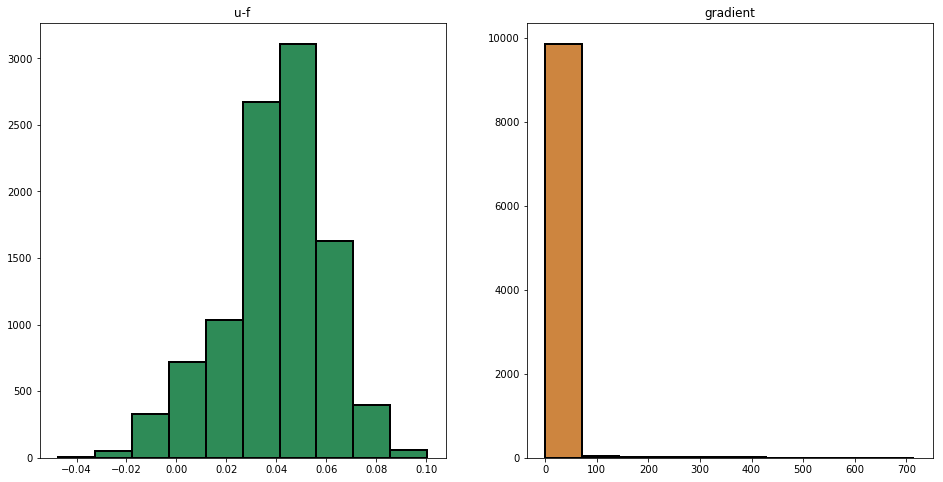

##########################################################################################
Processing 125 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 50100.
nfev: 50115

Residual stats:
Residual RMS: 0.006390242223486448
Residual Variance: 3.981956271192452e-05
Flux Lost: 0.013370740984753656
Flux Addition: 0.008654199137293083
psi1(u-f): 0.002304743545717883
Exceeded Pixels: 394
Sharpness: 45.353985700317686
psi2(grad u): 3.815298140391748
Total elapsed time: 52.349953413009644 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03553741905956308
Mean min distance between collocation and center

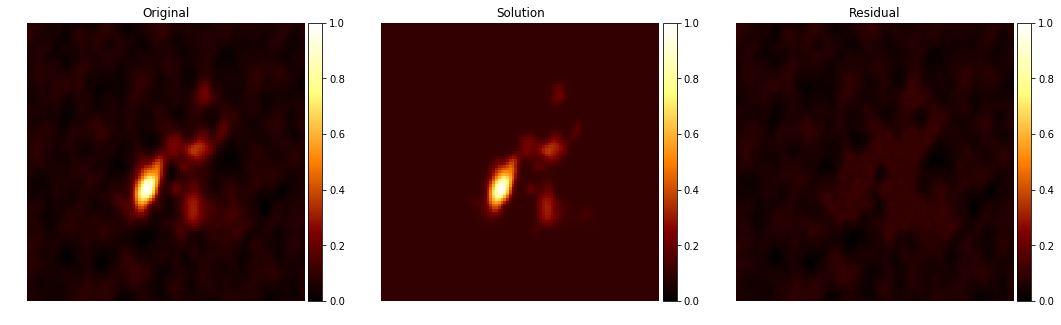

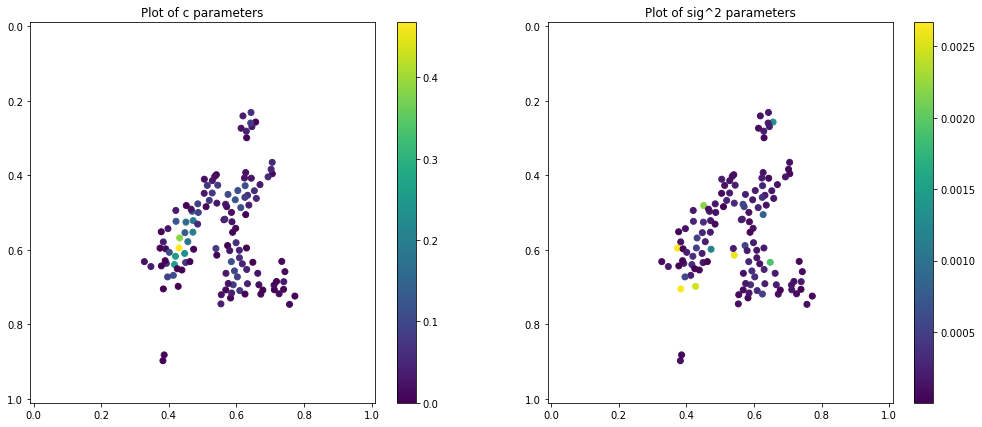

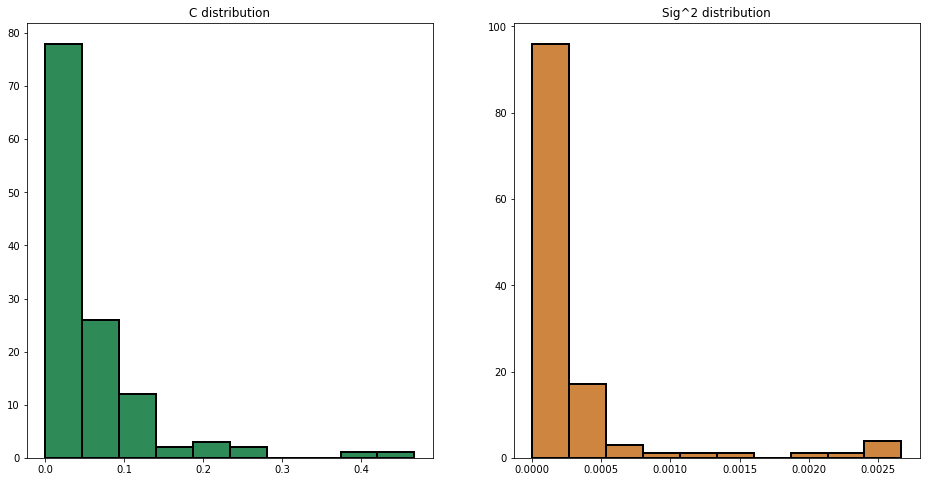

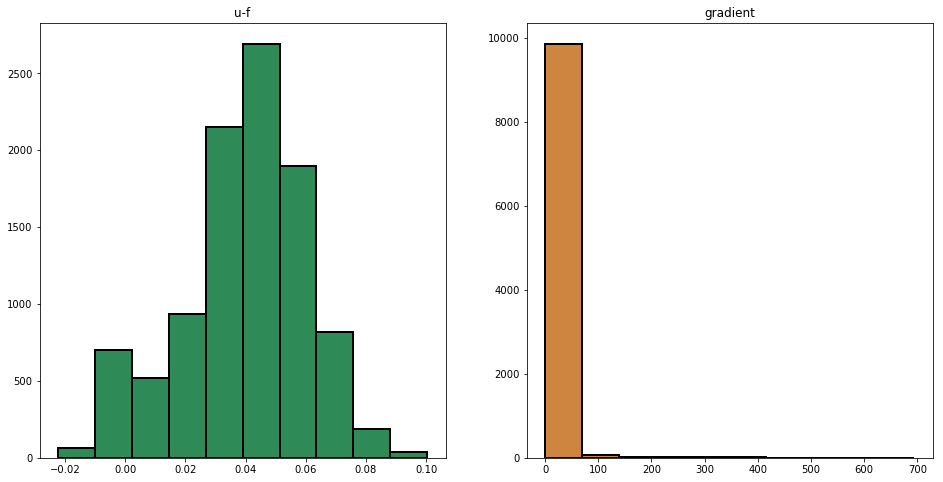

##########################################################################################
Processing 150 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 60100.
nfev: 60108

Residual stats:
Residual RMS: 0.00544186467077009
Residual Variance: 2.8841940409034374e-05
Flux Lost: 0.01108241578400183
Flux Addition: 0.0069704444635622816
psi1(u-f): 0.001362465600840411
Exceeded Pixels: 394
Sharpness: 45.46551791521717
psi2(grad u): 3.8473158826667126
Total elapsed time: 76.54221749305725 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03050528505810396
Mean min distance between collocation and center 

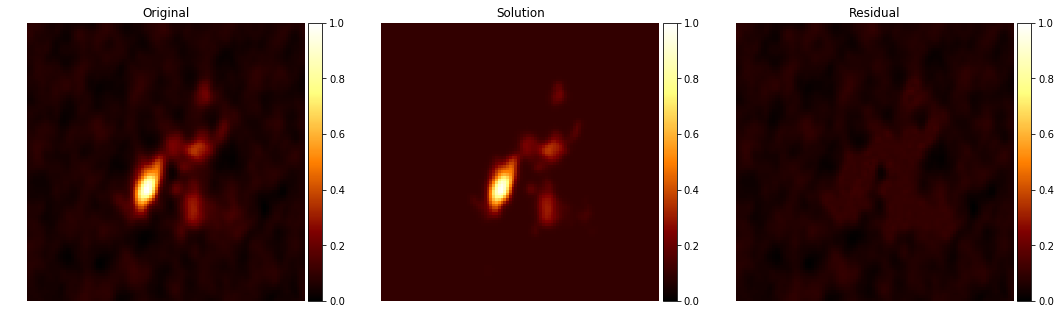

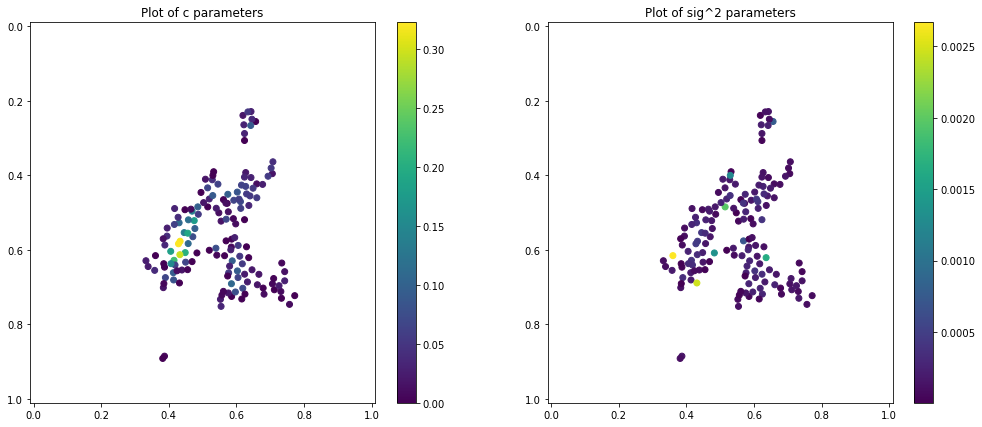

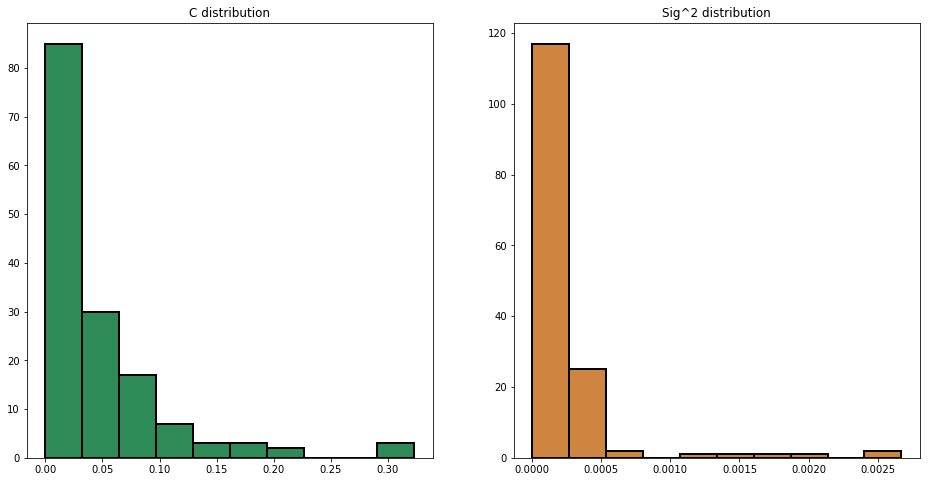

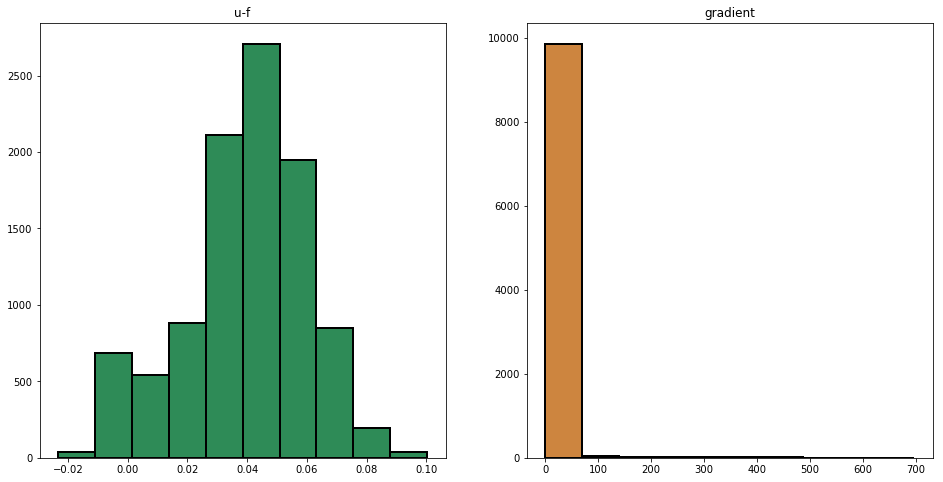

##########################################################################################
Processing 175 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 70100.
nfev: 70109

Residual stats:
Residual RMS: 0.005098188511105325
Residual Variance: 2.4938151212939306e-05
Flux Lost: 0.010594303458680818
Flux Addition: 0.005790925318191585
psi1(u-f): 0.0008317716236064298
Exceeded Pixels: 387
Sharpness: 45.48573430610042
psi2(grad u): 3.860294654325468
Total elapsed time: 110.80749988555908 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.02971766058403342
Mean min distance between collocation and cente

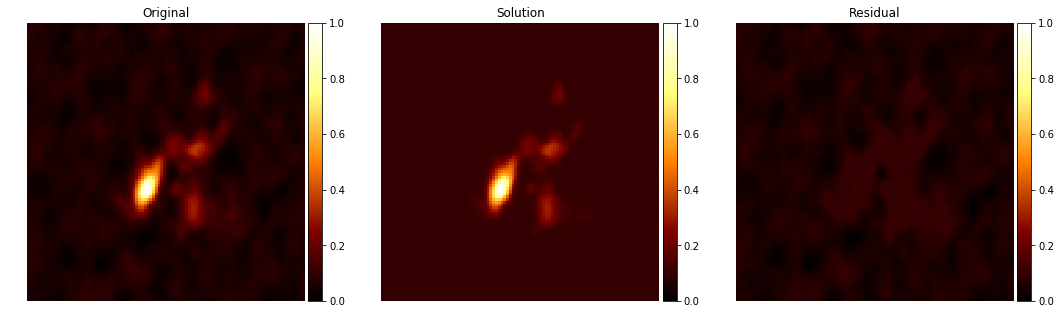

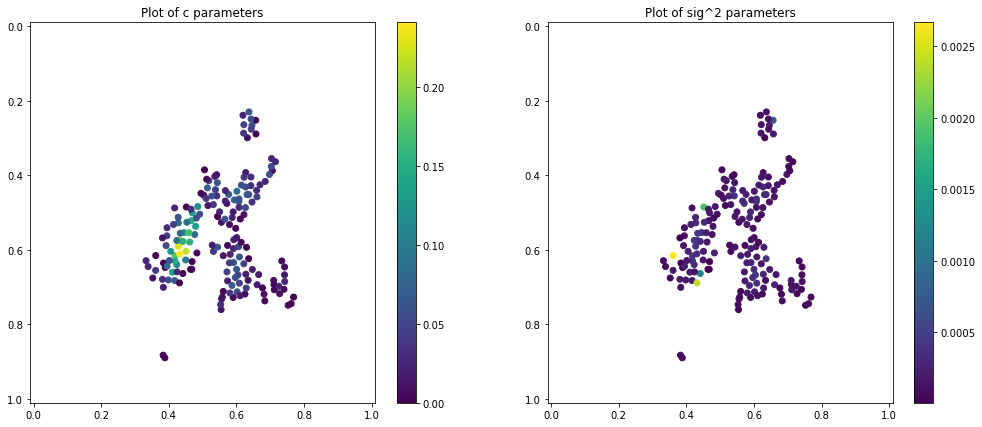

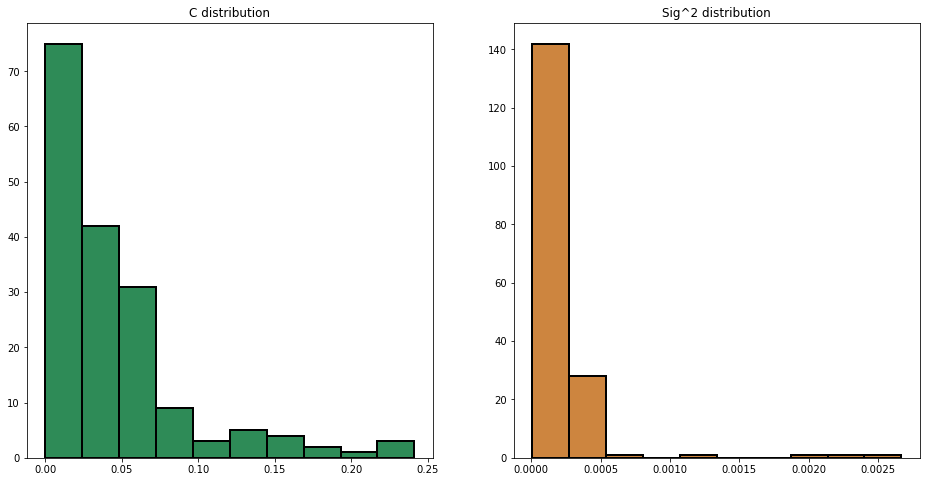

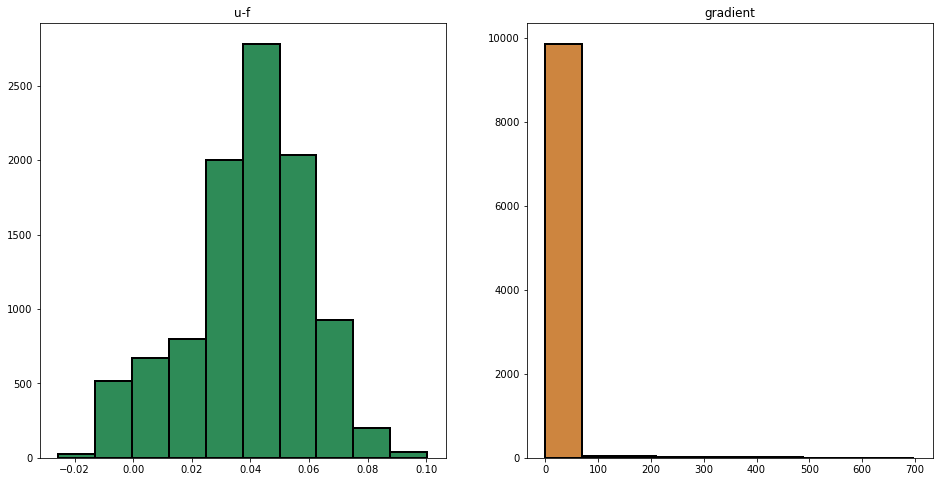

##########################################################################################
Processing 200 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80100.
nfev: 80109

Residual stats:
Residual RMS: 0.004926119191069916
Residual Variance: 2.326212611228257e-05
Flux Lost: 0.010080831677955334
Flux Addition: 0.0053901550486020085
psi1(u-f): 0.0007499278447863349
Exceeded Pixels: 386
Sharpness: 45.51100603898257
psi2(grad u): 3.8533496937917
Total elapsed time: 146.4555904865265 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.030023421937386916
Mean min distance between collocation and center 

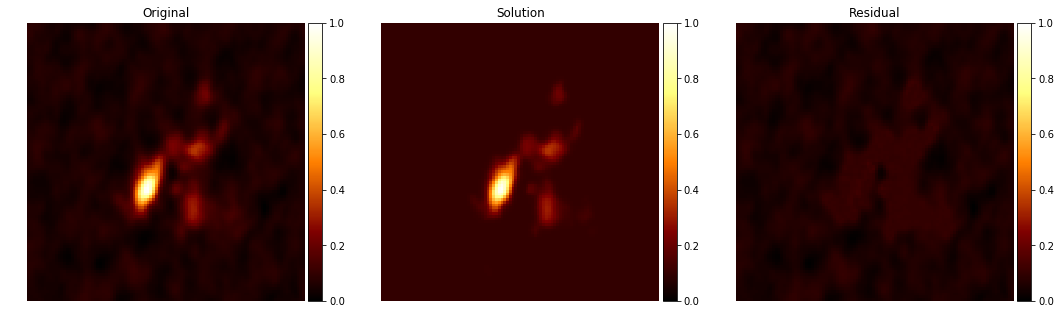

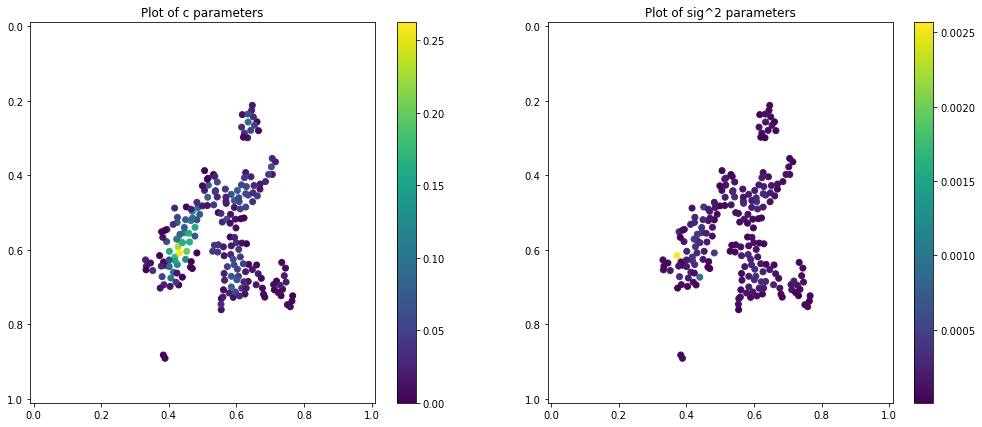

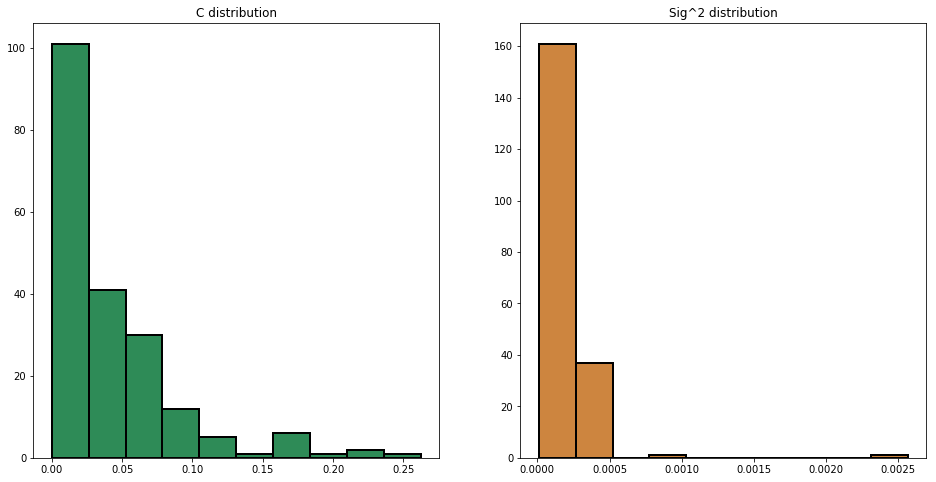

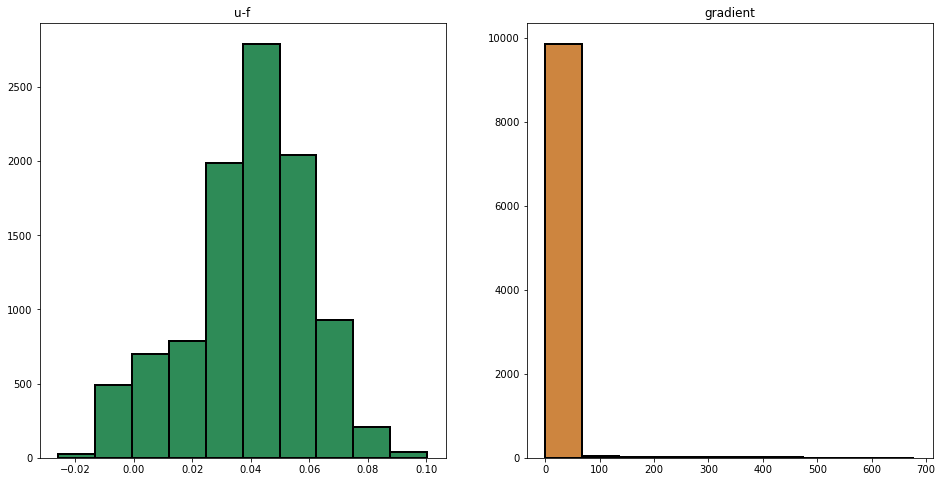

##########################################################################################
Processing 225 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 90100.
nfev: 90113

Residual stats:
Residual RMS: 0.004376359614072886
Residual Variance: 1.8329123907230813e-05
Flux Lost: 0.009245251553958927
Flux Addition: 0.004998463229565557
psi1(u-f): 0.0006132328584210891
Exceeded Pixels: 413
Sharpness: 45.59464946456834
psi2(grad u): 3.8655845391564503
Total elapsed time: 203.4346845149994 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.028561169408128237
Mean min distance between collocation and cent

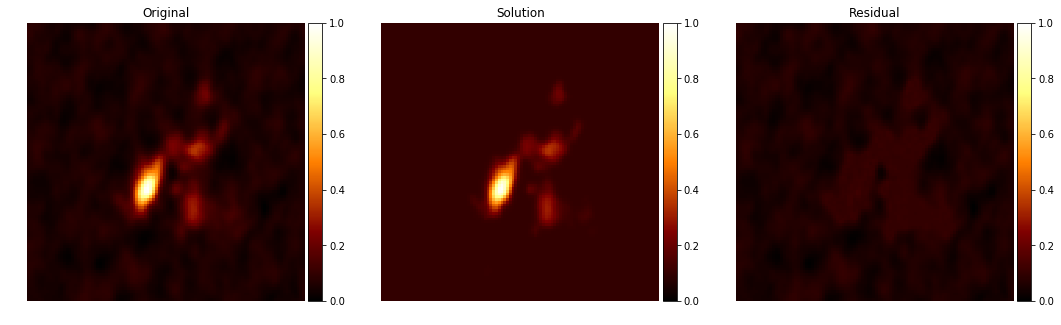

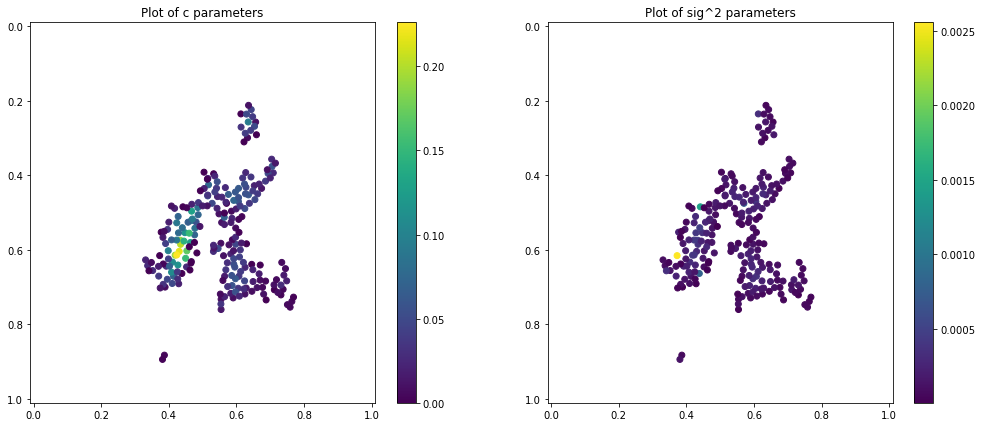

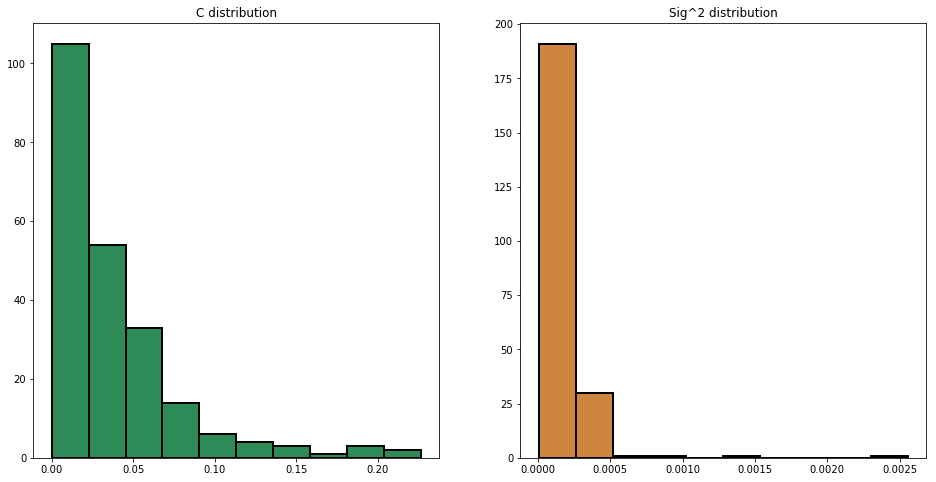

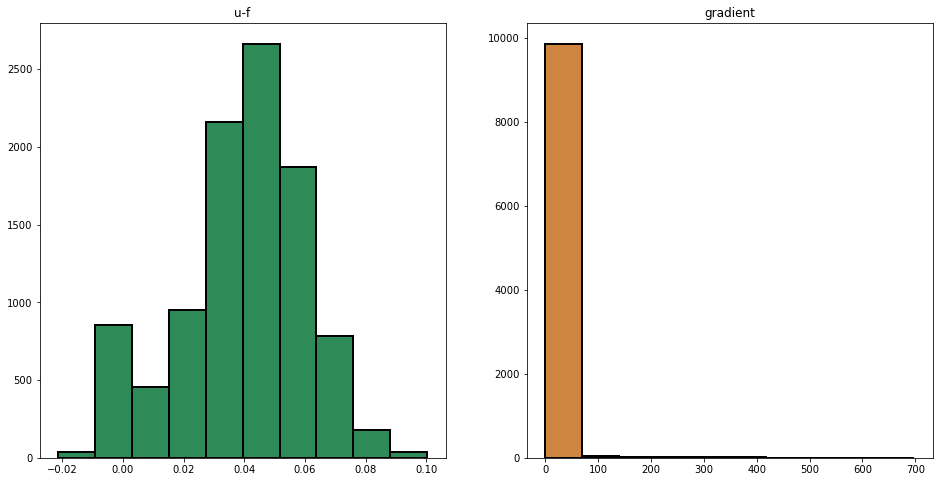

##########################################################################################
Processing 250 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100108

Residual stats:
Residual RMS: 0.004382238703218419
Residual Variance: 1.8368810119203587e-05
Flux Lost: 0.00907704209238252
Flux Addition: 0.004799915706395643
psi1(u-f): 0.000572140765844595
Exceeded Pixels: 386
Sharpness: 45.61421521632227
psi2(grad u): 3.8671018631319964
Total elapsed time: 285.28300309181213 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.024878890942390278
Mean min distance between collocation and cen

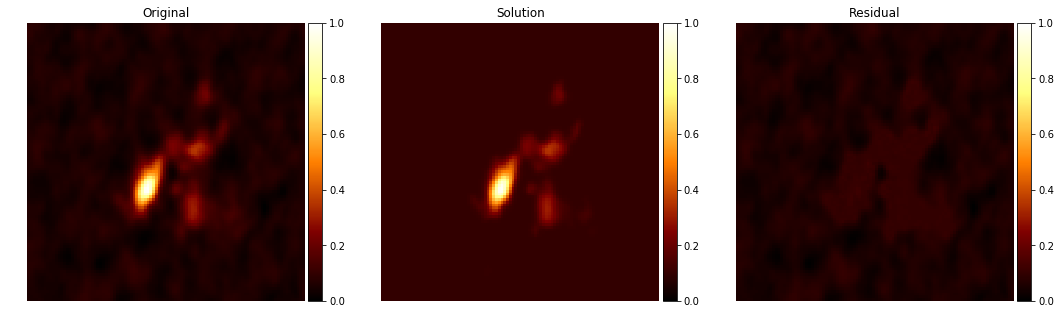

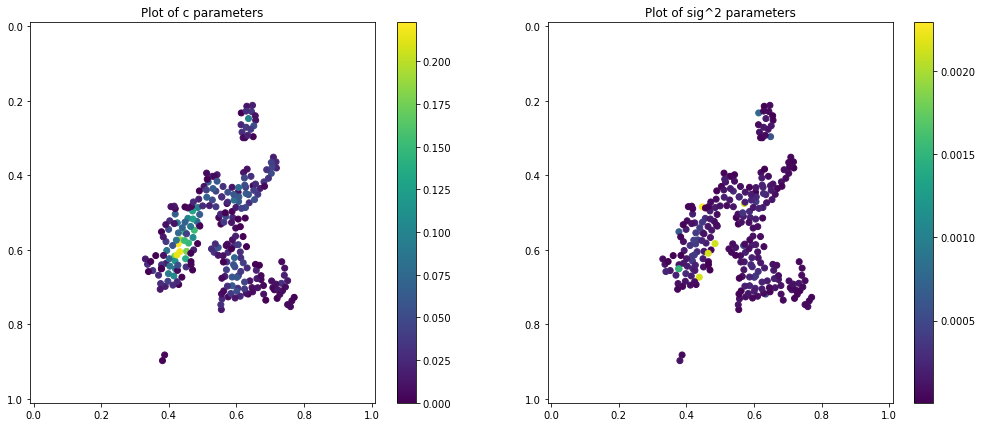

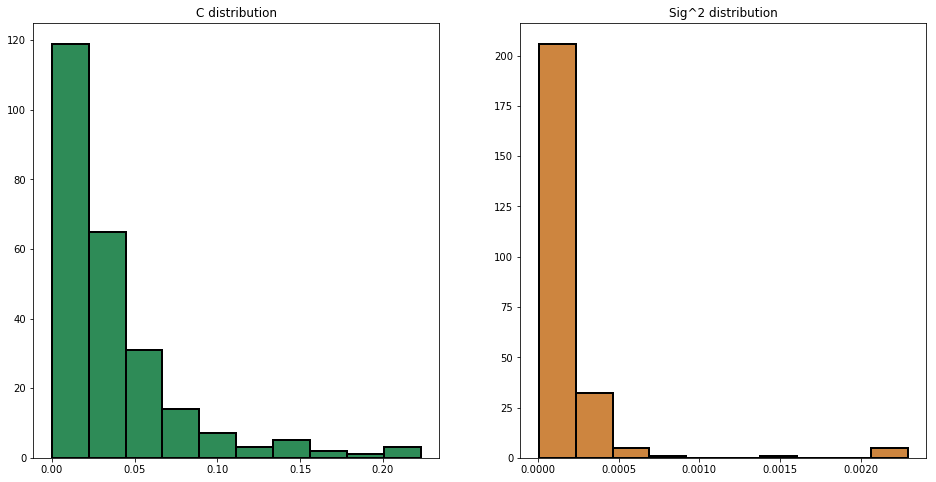

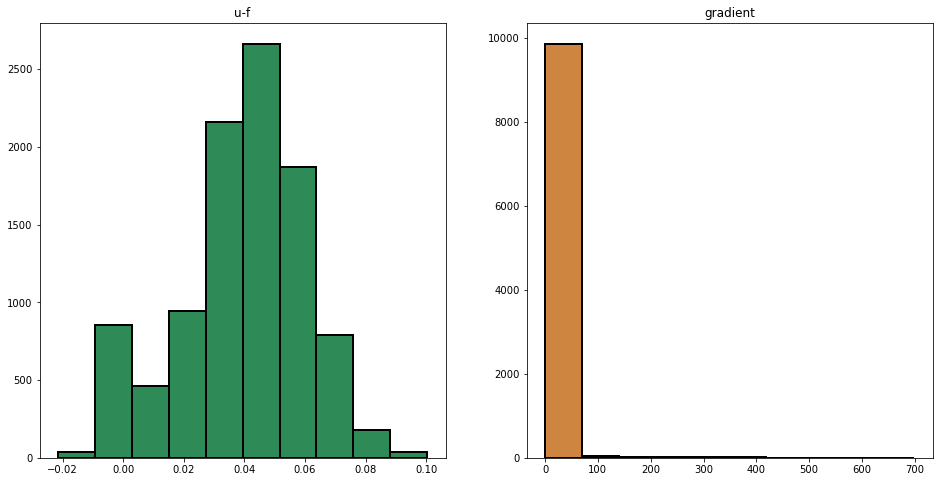

##########################################################################################
Processing 275 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 110100.
nfev: 110113

Residual stats:
Residual RMS: 0.00407697144849237
Residual Variance: 1.6014016914702243e-05
Flux Lost: 0.008406263890750436
Flux Addition: 0.004757947356456986
psi1(u-f): 0.0004600918902511761
Exceeded Pixels: 400
Sharpness: 45.63599876971642
psi2(grad u): 3.8546088496259614
Total elapsed time: 352.26634883880615 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.024137224675498906
Mean min distance between collocation and ce

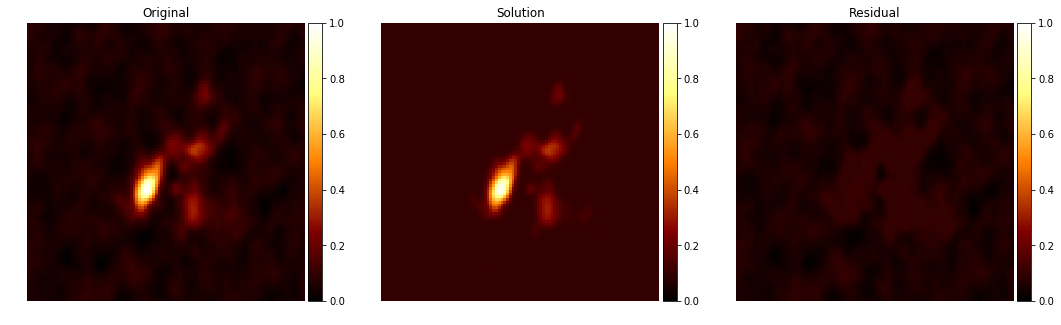

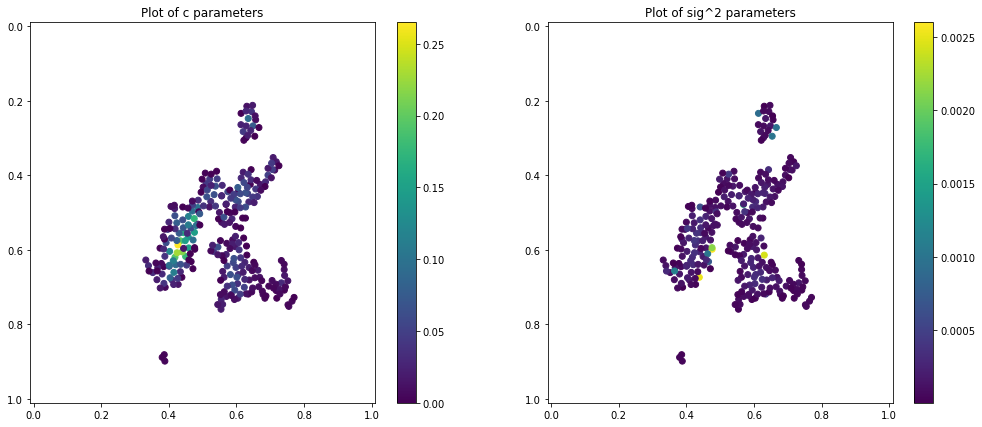

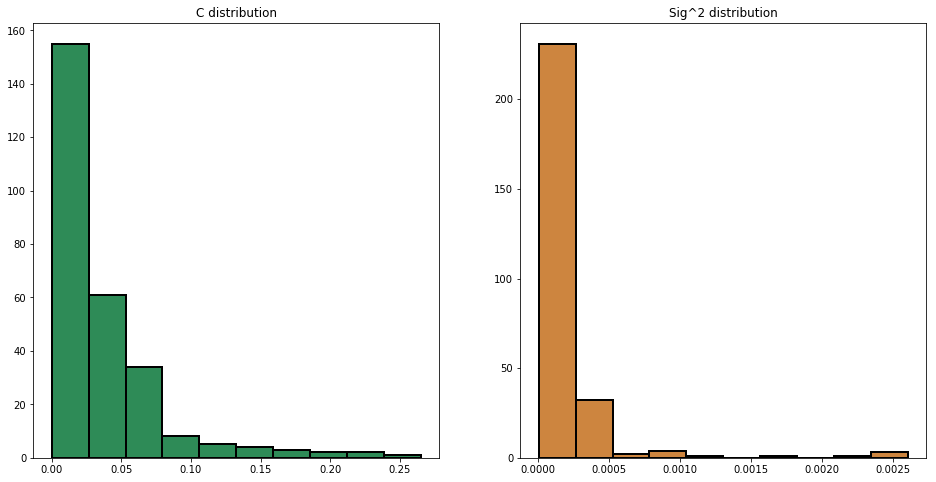

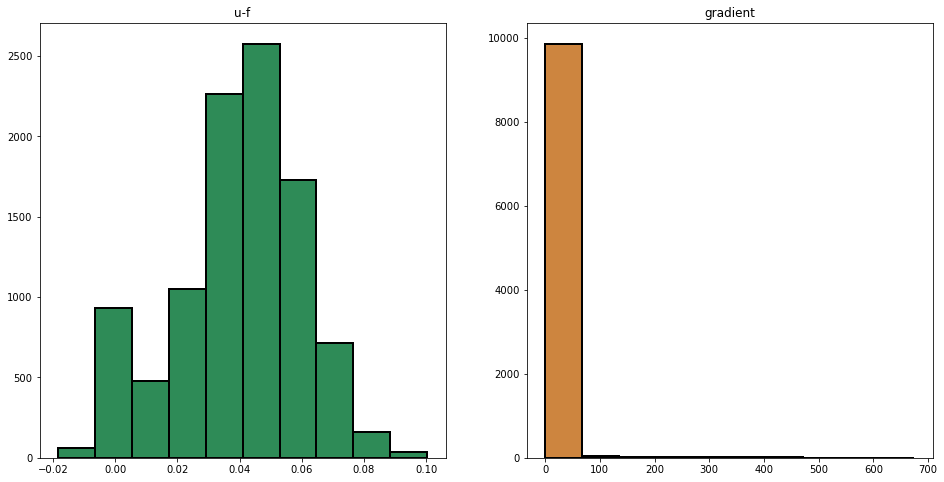

##########################################################################################
Processing 300 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120111

Residual stats:
Residual RMS: 0.003934789919743339
Residual Variance: 1.483462131247122e-05
Flux Lost: 0.008195550985625046
Flux Addition: 0.0044282859108861344
psi1(u-f): 0.0003717154289774459
Exceeded Pixels: 402
Sharpness: 45.63781635595339
psi2(grad u): 3.8660649952174113
Total elapsed time: 443.54291129112244 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.022634983555029787
Mean min distance between collocation and c

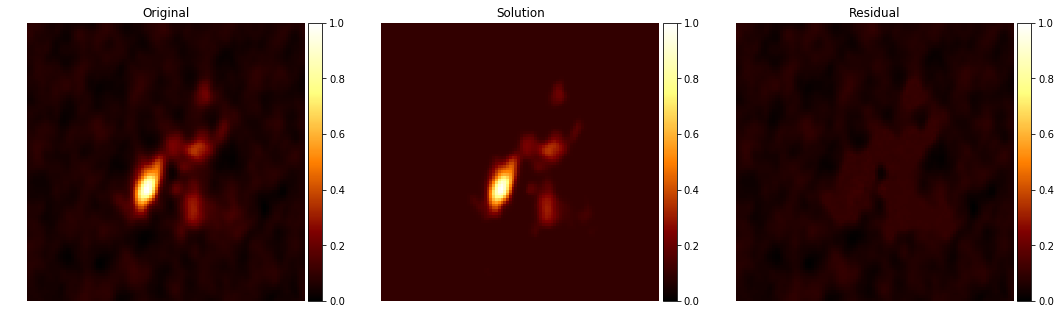

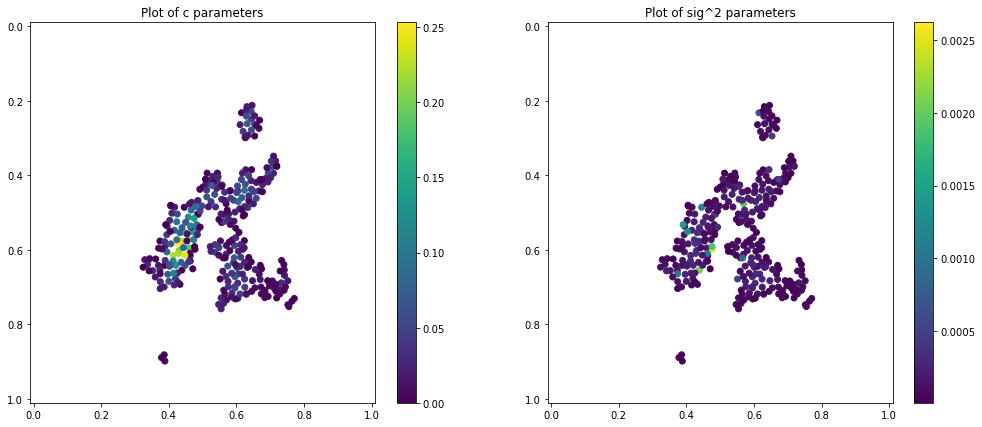

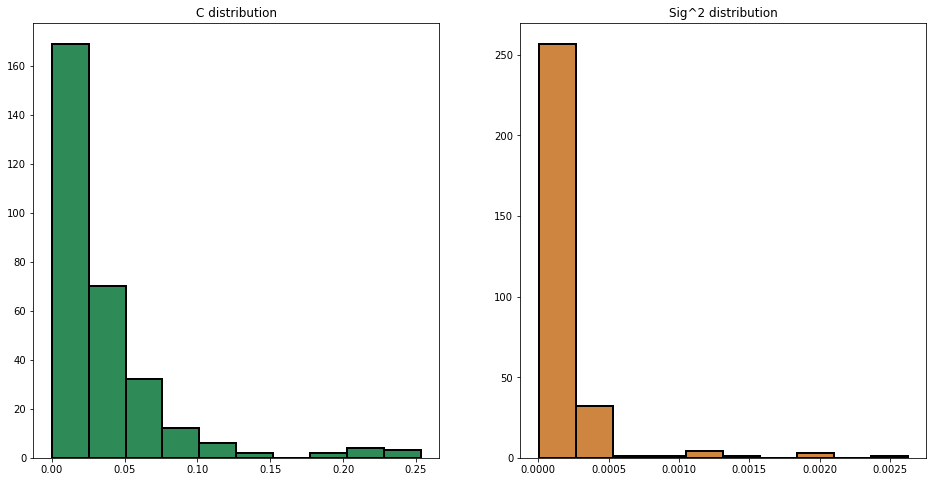

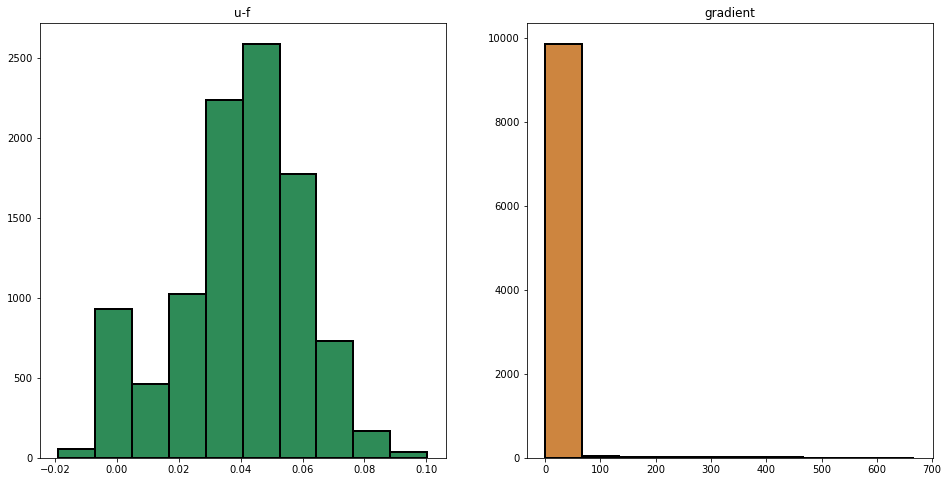

##########################################################################################
Processing 325 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 130100.
nfev: 130113

Residual stats:
Residual RMS: 0.0037178943900193187
Residual Variance: 1.3210044142028227e-05
Flux Lost: 0.007848468547579441
Flux Addition: 0.0041851278730514465
psi1(u-f): 0.00031906450043691357
Exceeded Pixels: 384
Sharpness: 45.73601035912667
psi2(grad u): 3.8839524329895214
Total elapsed time: 546.9612121582031 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.020378395703543453
Mean min distance between collocation and

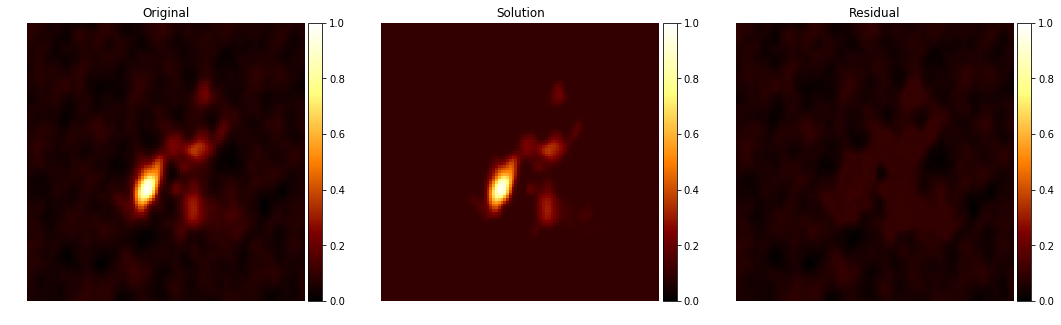

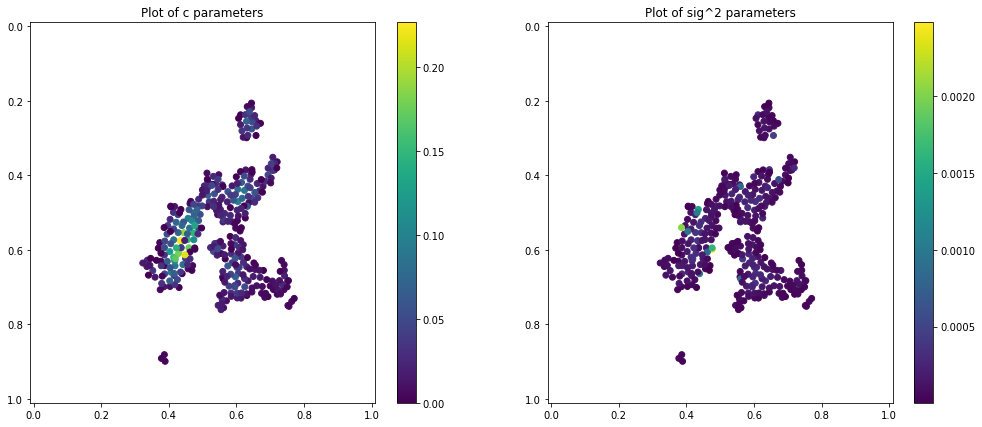

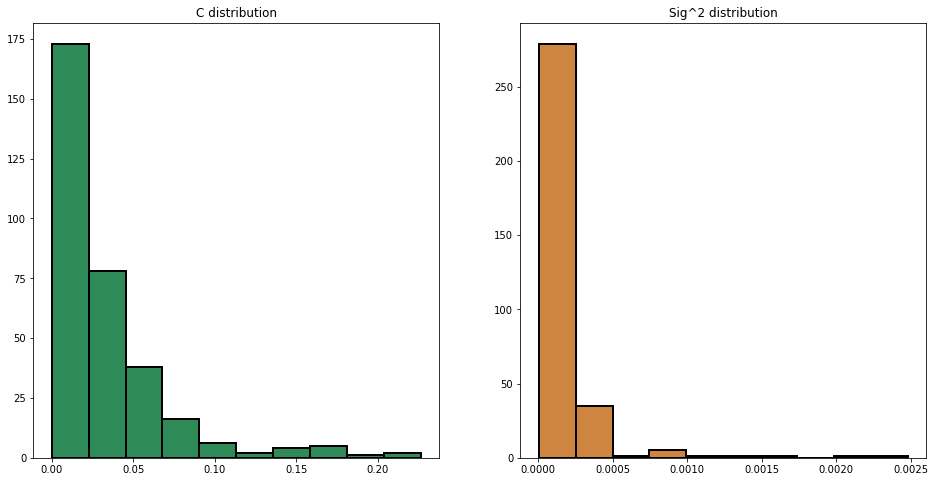

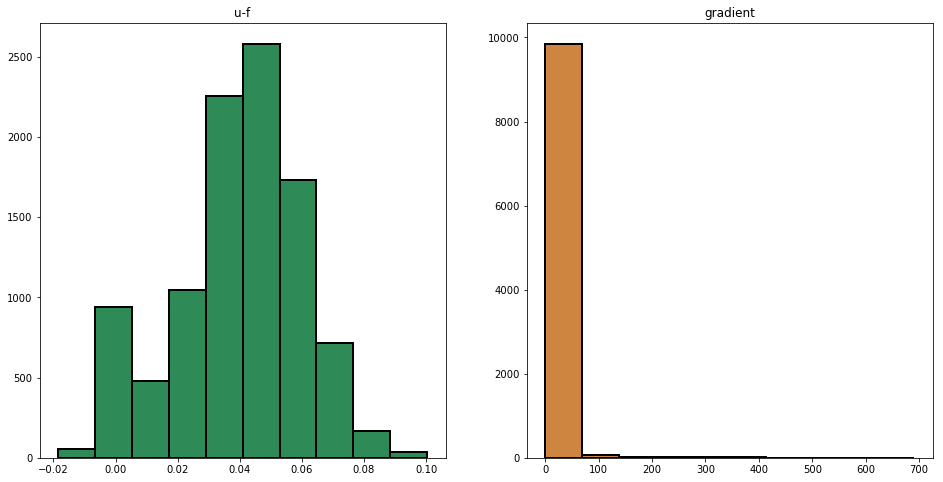

##########################################################################################
Processing 350 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 140100.
nfev: 140114

Residual stats:
Residual RMS: 0.003786665745489408
Residual Variance: 1.3647682639431783e-05
Flux Lost: 0.007936996440063444
Flux Addition: 0.00404616002858789
psi1(u-f): 0.00033037673426452853
Exceeded Pixels: 385
Sharpness: 45.676659538352155
psi2(grad u): 3.878280712756907
Total elapsed time: 665.4350166320801 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.018604815375433598
Mean min distance between collocation and ce

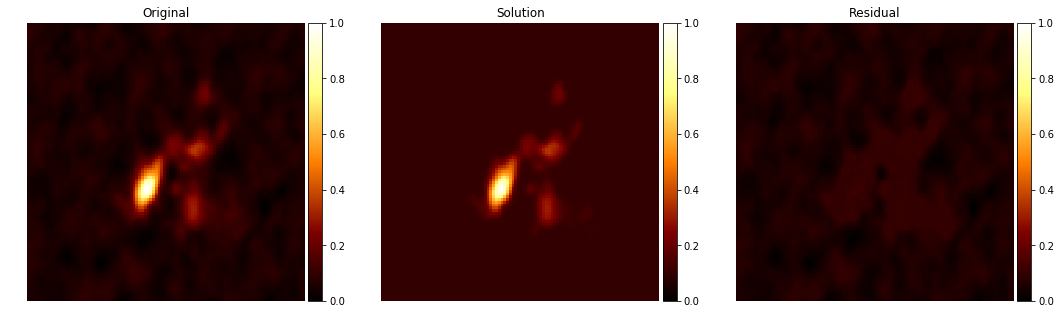

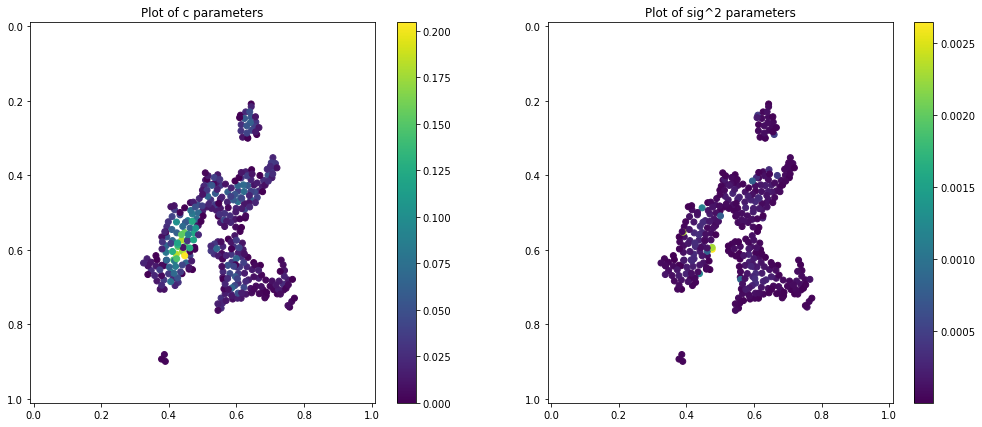

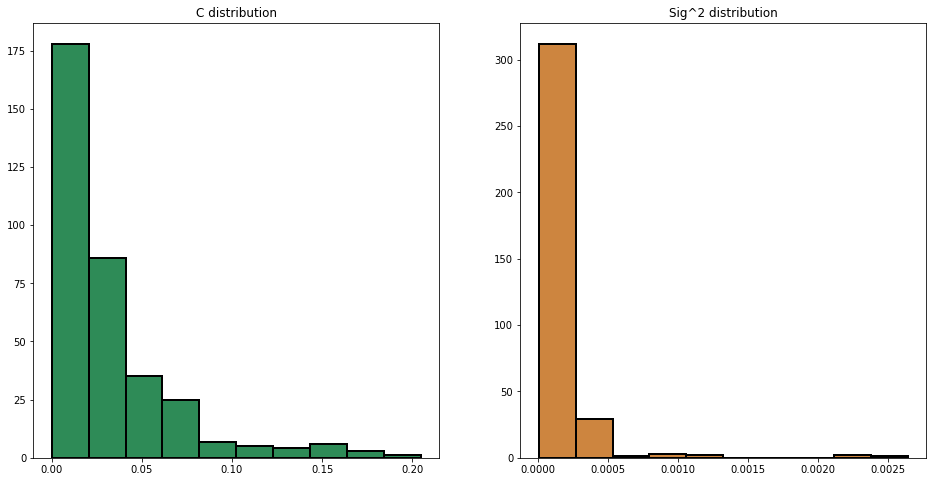

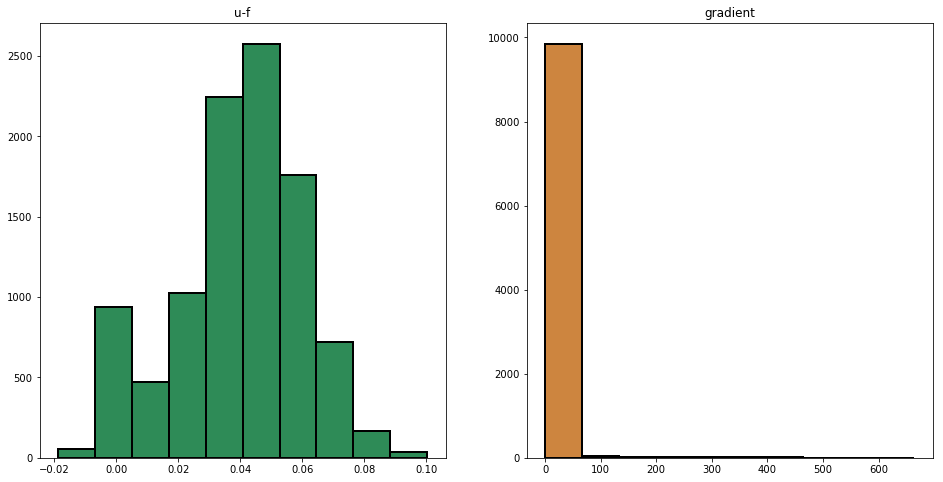

##########################################################################################
Processing 375 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 150100.
nfev: 150114

Residual stats:
Residual RMS: 0.003658044210411808
Residual Variance: 1.2729006499416324e-05
Flux Lost: 0.007681436596927172
Flux Addition: 0.0039016033179475502
psi1(u-f): 0.0002936966070594504
Exceeded Pixels: 379
Sharpness: 45.71678610190669
psi2(grad u): 3.8850164138314365
Total elapsed time: 840.8931736946106 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.021398020963857817
Mean min distance between collocation and c

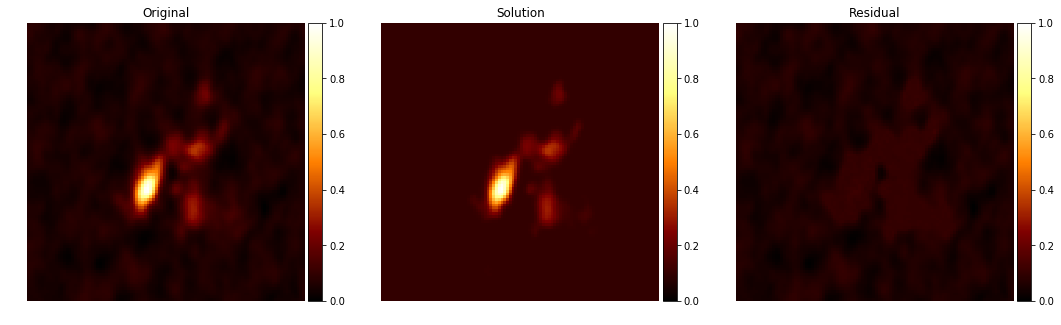

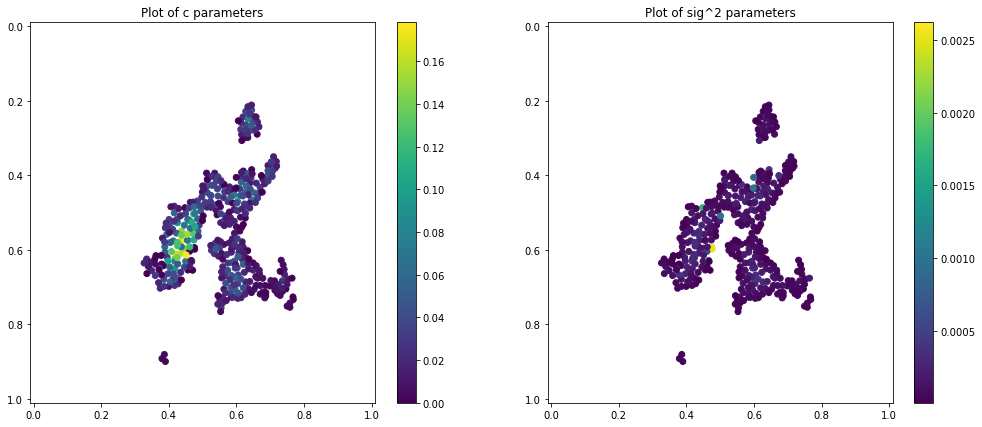

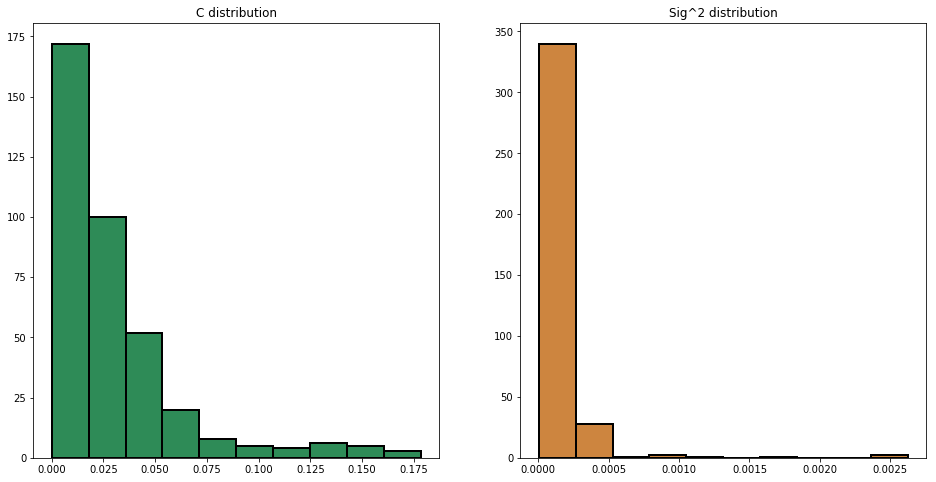

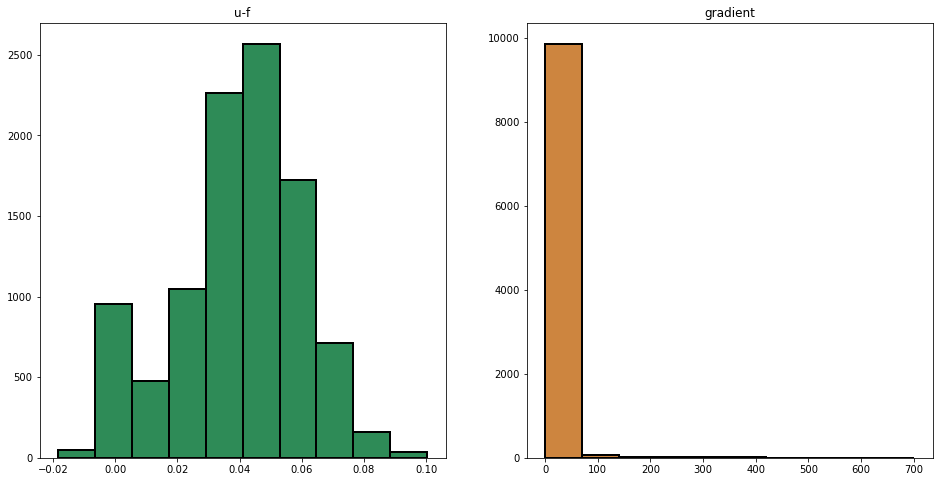

##########################################################################################
Processing 400 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 160100.
nfev: 160110

Residual stats:
Residual RMS: 0.0036250247708952145
Residual Variance: 1.241704989304718e-05
Flux Lost: 0.007735415427863676
Flux Addition: 0.0037538762297685195
psi1(u-f): 0.00022699291916118718
Exceeded Pixels: 396
Sharpness: 45.69667172435466
psi2(grad u): 3.8911149157248994
Total elapsed time: 934.7494692802429 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.0182531649196735
Mean min distance between collocation and ce

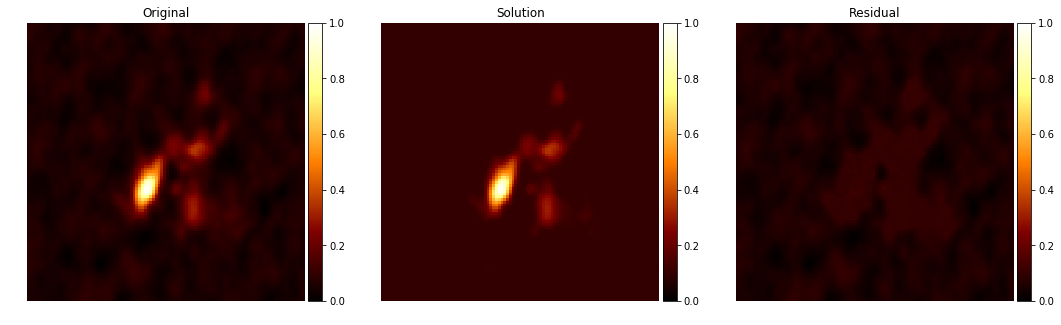

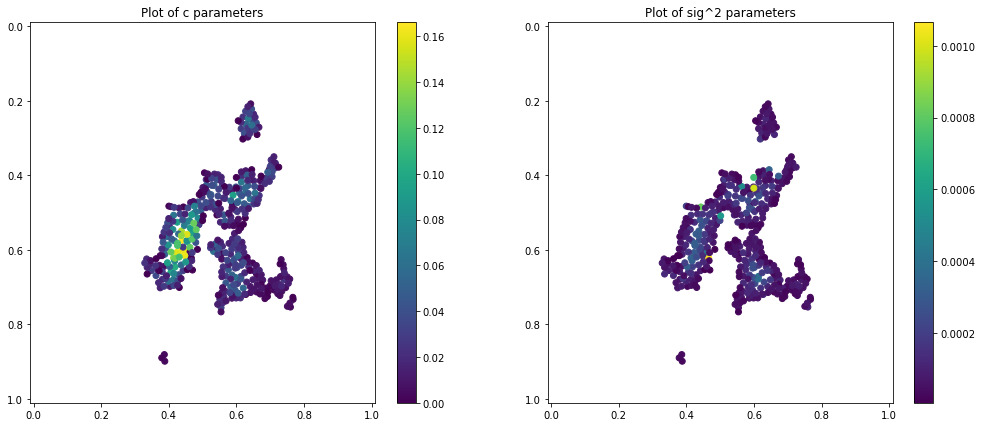

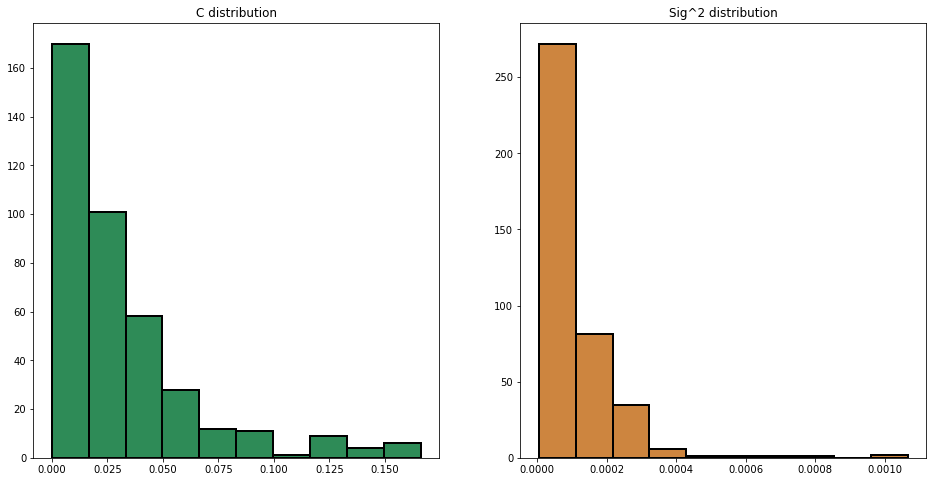

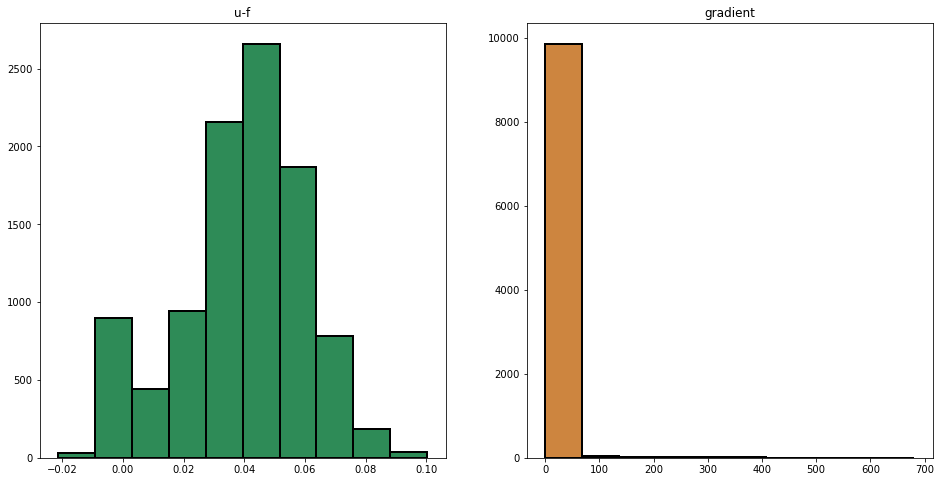

##########################################################################################
Processing 425 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 170100.
nfev: 170113

Residual stats:
Residual RMS: 0.0036067945095541627
Residual Variance: 1.2353049108737256e-05
Flux Lost: 0.007582034638993581
Flux Addition: 0.0037916793917475143
psi1(u-f): 0.00024311524093347043
Exceeded Pixels: 381
Sharpness: 45.69974633993074
psi2(grad u): 3.8850305188327936
Total elapsed time: 1152.3132486343384 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.01936467253903687
Mean min distance between collocation and

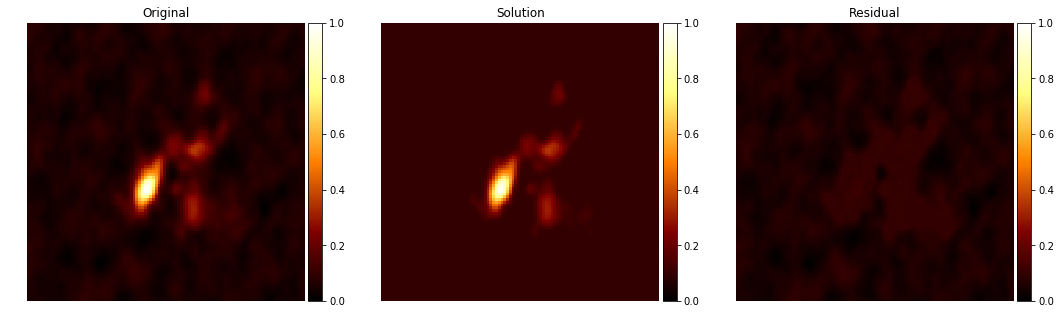

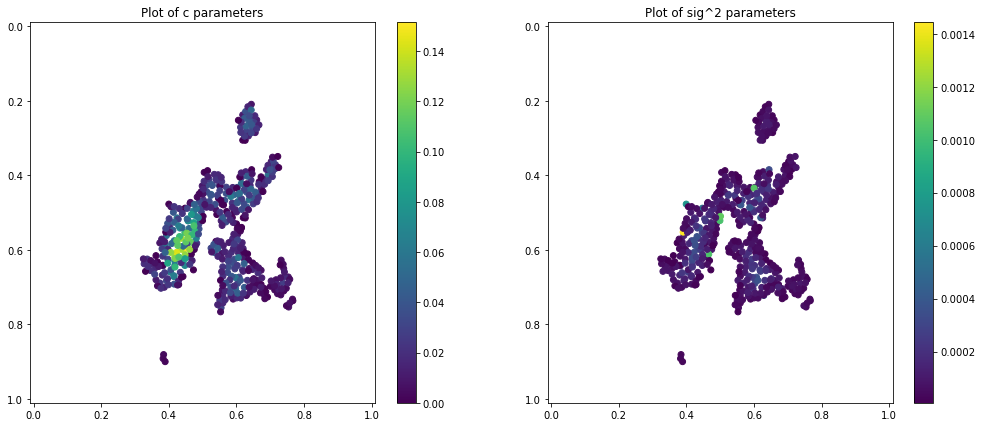

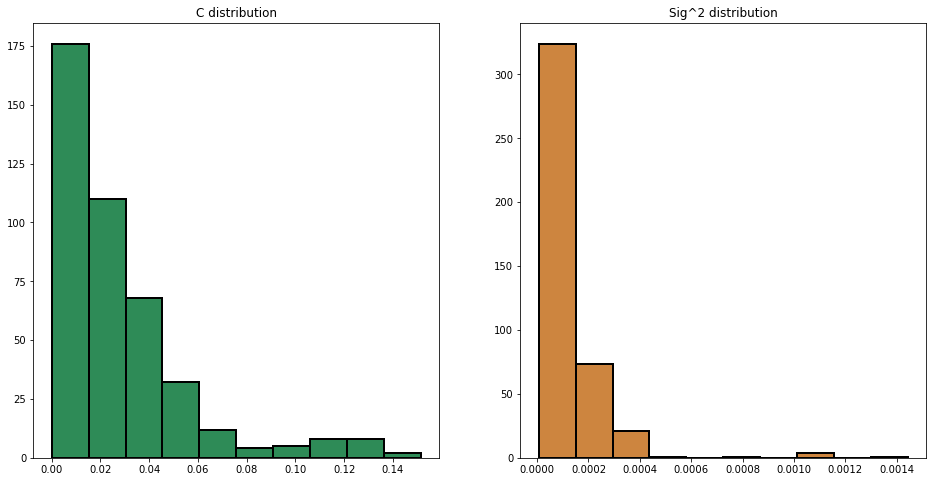

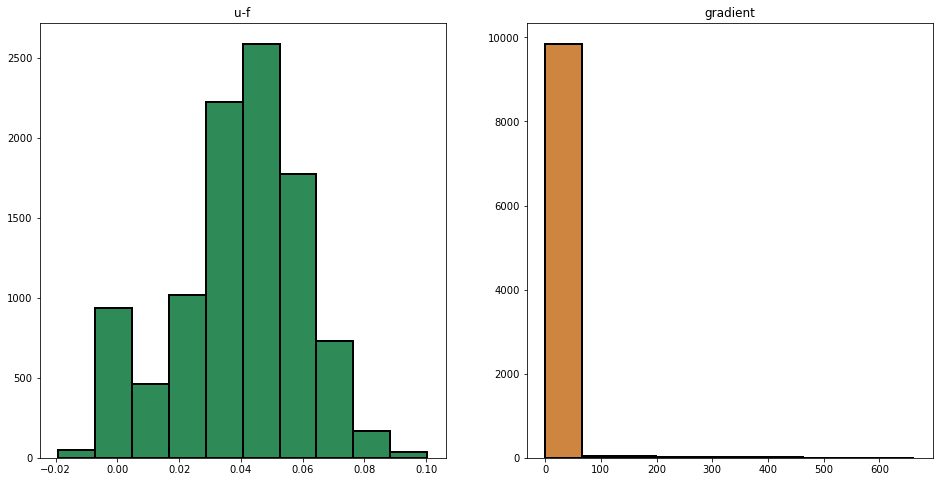

##########################################################################################
Processing 450 centers example
##########################################################################################



In [ ]:
for elm in elm_list:
    print('#'*90)
    print('Processing {0} centers example'.format(len(elm.c)))
    print('#'*90 + '\n')
    nfev = 100*(len(elm.get_params())+1)
    elm_solver(elm, method='standard', max_nfev=nfev)
    # for memory reasons
    del elm.data; del elm.mask; del elm.dfunc
    
# pickling results
target = open("exp01_orion.pkl", "wb")
pickle.dump(elm_list, target)
target.close()

## Analysis of results in `Orion KL`

In [6]:
elm_list = pickle.load( open('../results/exp01_orion.pkl', 'rb') )

FileNotFoundError: [Errno 2] No such file or directory: '../results/exp01_orion.pkl'

In [ ]:
n_center = np.array( [len(elm.c) for elm in elm_list] )
r_stats = [elm.residual_stats for elm in elm_list]

variance = np.array( [var for (var,_,_,_,_,_,_,_,_) in r_stats] )
entropy = np.array( [entr for (_,entr,_,_,_,_,_,_,_) in r_stats] )
rms = np.array( [rms for (_,_,rms,_,_,_,_,_,_) in r_stats] )
flux_addition = np.array( [flux for (_,_,_,flux,_,_,_,_,_) in r_stats] )
flux_lost = np.array( [flux for (_,_,_,_,flux,_,_,_,_) in r_stats] )
psi1_int = np.array( [psi1 for (_,_,_,_,_,psi1,_,_,_) in r_stats] )
npix = np.array( [npix for (_,_,_,_,_,_,npix,_,_) in r_stats] )
sharpness = np.array( [sharp for (_,_,_,_,_,_,_,sharp,_) in r_stats] )
psi2_int = np.array( [psi2 for (_,_,_,_,_,_,_,_,psi2) in r_stats] )

times = np.array([elm.elapsed_time for elm in elm_list])

In [ ]:
stats_plot(n_center, r_stats, x_label='number of centers', loglog=True, slopes=[-2.,-1.,-1.,-1.,-2.,0.01,0.01,-0.1])